In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Sample_Data_AI_Lab_Final.csv')

In [ ]:
# Handling missing values
print("Missing values before handling:")
print(df.isnull().sum())

for col in df.select_dtypes(include=np.number).columns:
    if df[col].isnull().any():
        if col in df.columns:
            if df[col].isnull().sum() > 0:
              print(f"Imputing missing values in numerical column: {col}")
              df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object').columns:
  if df[col].isnull().any():
    if col in df.columns:
      if df[col].isnull().sum() > 0:
        print(f"Imputing missing values in categorical column: {col}")
        df[col].fillna(df[col].mode()[0], inplace=True)

# Dropping columns with excessive missing values
missing_threshold = 0.5
columns_to_drop = df.columns[df.isnull().mean() > missing_threshold]
df.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns with excessive missing values: {list(columns_to_drop)}")

# Removing rows with missing values
rows_before = len(df)
df.dropna(inplace=True)
rows_after = len(df)
if rows_before != rows_after:
  print(f"Removed {rows_before - rows_after} rows with missing values after imputation.")

print("\nMissing values after handling:")
print(df.isnull().sum())

print("\nUpdated DataFrame:")
print(df.head())


Missing values before handling:
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MonthlyCharges      0
TotalCharges        0
Contract            0
dtype: int64
Dropped columns with excessive missing values: []

Missing values after handling:
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MonthlyCharges      0
TotalCharges        0
Contract            0
dtype: int64

Updated DataFrame:
   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               3             3   
1              0                2               0             1   
2              1                2               0             0   
3              0                1               0             0   
4              0     

In [ ]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Contract':
        print(f"\nEncoding column: {col}")
        if df[col].nunique() > 10:
            print(f"Applying Label Encoding to: {col}")
            df[col] = df[col].astype('category').cat.codes
        else:
            print(f"Applying One-Hot Encoding to: {col}")
            df = pd.get_dummies(df, columns=[col], prefix=col)

# Label encoding the 'Contract Column'
print("\nLabel encoding the target column: Contract")
label_encoder = LabelEncoder()
df['Contract'] = label_encoder.fit_transform(df['Contract'])

print("\nDataFrame after encoding:")
print(df.head())




Encoding column: TotalCharges
Applying Label Encoding to: TotalCharges

Label encoding the target column: Contract

DataFrame after encoding:
   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               3             3   
1              0                2               0             1   
2              1                2               0             0   
3              0                1               0             0   
4              0                1               1             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 3            3            3                3   
1                 1            0            1                0   
2                 0            0            0                0   
3                 0            0            0                1   
4                 1            0            0                0   

   MonthlyCharges  TotalCharges  Contract  
0           2

In [ ]:
scaler = MinMaxScaler()
num_features = ['MonthlyCharges','TotalCharges']
df[num_features] = scaler.fit_transform(df[num_features])
print("\nDataFrame after normalization:")
print(df.head())





DataFrame after normalization:
   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               3             3   
1              0                2               0             1   
2              1                2               0             0   
3              0                1               0             0   
4              0                1               1             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 3            3            3                3   
1                 1            0            1                0   
2                 0            0            0                0   
3                 0            0            0                1   
4                 1            0            0                0   

   MonthlyCharges  TotalCharges  Contract  
0        0.058209      0.190018         2  
1        0.695522      0.517112         0  
2        0.564179      0.378966     

In [ ]:
X = df.drop('Contract', axis=1)
y = df['Contract']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 4788
Testing set size: 1198


In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors (KNN) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("\nNaive Bayes Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


K-Nearest Neighbors (KNN) Results
Accuracy: 0.67779632721202
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       664
           1       0.38      0.32      0.35       250
           2       0.68      0.59      0.63       284

    accuracy                           0.68      1198
   macro avg       0.61      0.59      0.60      1198
weighted avg       0.66      0.68      0.67      1198


Random Forest Classifier Results
Accuracy: 0.6853088480801336
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       664
           1       0.38      0.34      0.36       250
           2       0.67      0.62      0.64       284

    accuracy                           0.69      1198
   macro avg       0.61      0.60      0.60      1198
weighted avg       0.67      0.69      0.68      1198


Naive Bayes Classifier Results
Accuracy: 0.5567612687813022
              precision    recall  f1-score   suppor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


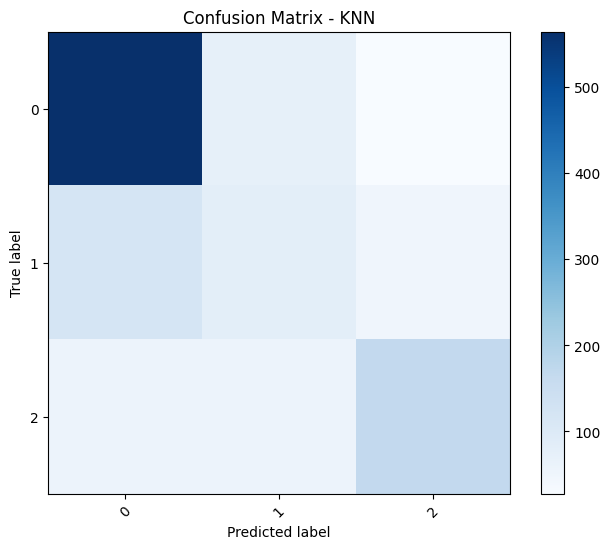

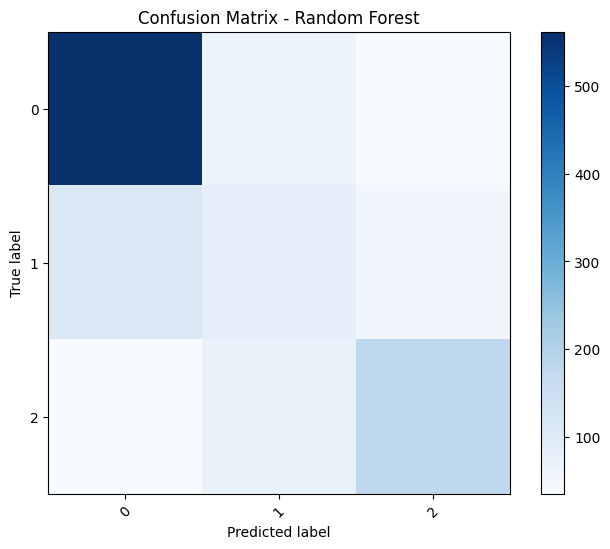

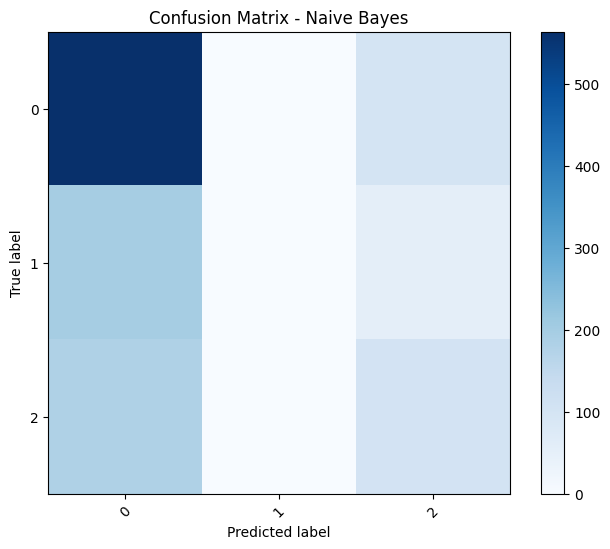

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from itertools import cycle

# Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(y)))
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, "Confusion Matrix - KNN")

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Confusion Matrix - Random Forest")

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb, "Confusion Matrix - Naive Bayes")


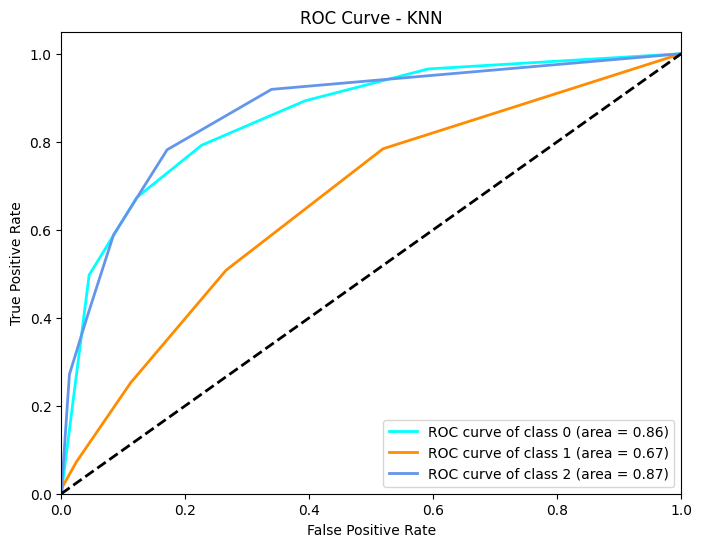

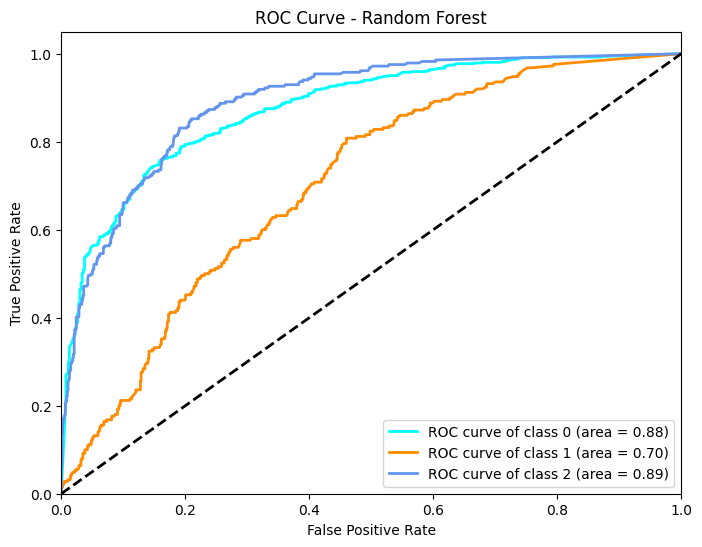

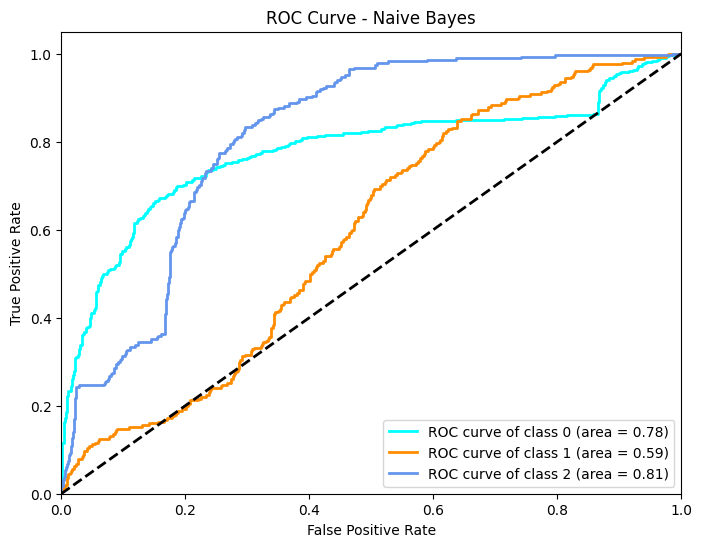

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust based on the number of classes
n_classes = y_test_bin.shape[1]

# Function to plot ROC Curve for multiclass
def plot_multiclass_roc(y_test_bin, y_pred_prob, n_classes, title):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# ROC curve for KNN
knn_ovr = OneVsRestClassifier(KNeighborsClassifier())
y_pred_knn_prob = knn_ovr.fit(X_train, y_train).predict_proba(X_test)
plot_multiclass_roc(y_test_bin, y_pred_knn_prob, n_classes, "ROC Curve - KNN")

# ROC curve for Random Forest
rf_ovr = OneVsRestClassifier(RandomForestClassifier())
y_pred_rf_prob = rf_ovr.fit(X_train, y_train).predict_proba(X_test)
plot_multiclass_roc(y_test_bin, y_pred_rf_prob, n_classes, "ROC Curve - Random Forest")

# ROC curve for Naive Bayes
nb_ovr = OneVsRestClassifier(GaussianNB())
y_pred_nb_prob = nb_ovr.fit(X_train, y_train).predict_proba(X_test)
plot_multiclass_roc(y_test_bin, y_pred_nb_prob, n_classes, "ROC Curve - Naive Bayes")

In [ ]:
# Save the final processed DataFrame to a CSV file
df.to_csv('processed_data.csv', index=False)
print("The DataFrame has been saved to 'processed_data.csv'.")


The DataFrame has been saved to 'processed_data.csv'.
